## Coordinate Descent

A simple and much neglected optimization technique that can be surprisingly useful for certain classes of problems.

In the simplest case of cyclic coordinate descent, one cyclically iterates through the directions, one at a time, minimizing the objective function with respect to each coordinate direction at a time.

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


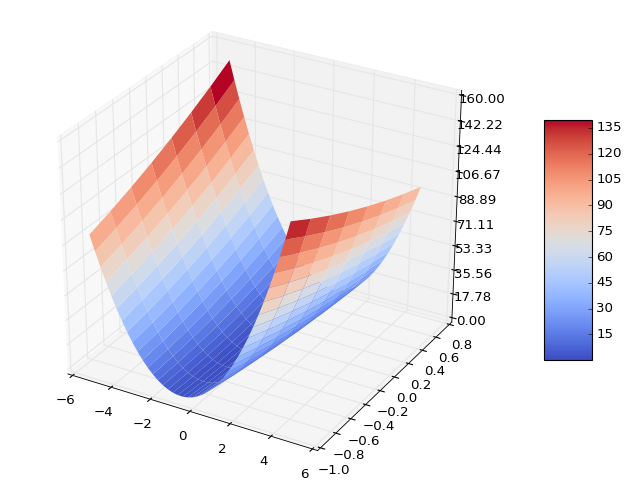

In [3]:
%pylab nbagg
import numpy as np
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from itertools import starmap
from mpl_toolkits.mplot3d import Axes3D

## Functions and partial derivatives
def f(x, y):
    return 5*x**2 - 6*x*y + 5*y**2

def f_prime_x_min(y):
    # partial derivative of f w.r.t x: 10x - 6y
    # setting this to 0, we get: x_min = 6y/10
    return 6*y/10

def f_prime_y_min(x):
    # partial derivative of f w.r.t y: -6*x + 10*y    
    # setting this to 0, we get: y_min = 6x/10
    return 6*x/10

fig = plt.figure()
ax = Axes3D(fig)

X = np.arange(-5, 5, 0.25)
Y = np.arange(-1, 1, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.array([z for z in starmap(f, zip(X, Y))])
             
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                       cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
             
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)        


In [4]:
def coord_descent(n_iters=100, x_init=5.0, y_init=5.0):
    x, y = x_init, y_init
    
    for i in range(n_iters):
        x = f_prime_x_min(y)
        y = f_prime_y_min(x)        
    
    print('Min value of f(x, y) =5*x**2 - 6*x*y + 5*y**2 is at (%.2f, %.2f) : [%.2f]' % (x, y, f(x, y)))
    
coord_descent()

Min value of f(x, y) =5*x**2 - 6*x*y + 5*y**2 is at (0.00, 0.00) : [0.00]


## Coordinate Selection

The cyclic version of coordinate descent cycles thorugh the coordinates one at a time. One might ask: is there a better way of selecting the next coordinate to optimize on?

An alternative is to use random selection.

Another alternative that's been shown to work better is called Gauss-Southwell condition. At every iteration, we minimize the coordinate that maximizes the absolute value of the directional derivative: $$i^k = argmax_i\ |\ \nabla_i\ f(x^k)\ |$$

## When to Use Coordinate Descent

Coordinate descent <i>can be</i> n times faster than gradient descent for two types of optimization functions: 

$$h(x)\ =\ f(Ax)\ +\ \sum_{i}g_i(x),\ where\ A\ is\ a\ matrix\ and\ g_{i}(x)s\ are\ convex.$$

Example: Least squares, Lasso, SVM.

The other type is of the form:

$$h(x)\ =\ \sum_{i,j\ \in\ E}f_{i\ j}(X_i, X_j) +\ \sum_{i}g_i(x),\ where\ E\ is\ the\ edge\ set\ of\ a\ graph\ and\ g_{i}(x)s\ are\ convex.$$

Example: PGM, Quadratic solvers.